In [8]:
import ee
import geopandas as gpd
import geemap
import xarray as xr
import wxee

In [9]:
xr.open_dataset(r"D:\Factor-Data\Tesina\Tesina\Validation\2015_parana_delta_mode.nc")

<xarray.Dataset>
Dimensions:      (time: 1, y: 1858, x: 2598)
Coordinates:
  * time         (time) object '2015-08'
  * x            (x) float32 -59.5 -59.5 -59.5 -59.5 ... -58.8 -58.8 -58.8 -58.8
  * y            (y) float32 -33.5 -33.5 -33.5 -33.5 ... -34.0 -34.0 -34.0 -34.0
    spatial_ref  int32 ...
Data variables:
    label        (time, y, x) float32 ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

In [10]:
xr.open_dataset(r"D:\Factor-Data\Tesina\Tesina\Validation\2015_parana_delta_mode_pooled_30m.nc")

<xarray.Dataset>
Dimensions:      (time: 1, y: 1858, x: 2598)
Coordinates:
  * time         (time) object '2015-08'
  * x            (x) float32 -59.5 -59.5 -59.5 -59.5 ... -58.8 -58.8 -58.8 -58.8
  * y            (y) float32 -33.5 -33.5 -33.5 -33.5 ... -34.0 -34.0 -34.0 -34.0
    spatial_ref  int32 ...
Data variables:
    label        (time, y, x) float32 ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

In [11]:
xr.open_dataset(r"D:\Factor-Data\Tesina\Tesina\Validation\2015_parana_delta_mean_pooled_30m.nc")

<xarray.Dataset>
Dimensions:      (time: 1, y: 1858, x: 2598)
Coordinates:
  * time         (time) object '2015-08'
  * x            (x) float32 -59.5 -59.5 -59.5 -59.5 ... -58.8 -58.8 -58.8 -58.8
  * y            (y) float32 -33.5 -33.5 -33.5 -33.5 ... -34.0 -34.0 -34.0 -34.0
    spatial_ref  int32 ...
Data variables:
    label        (time, y, x) float32 ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

xarray.Dataset {
dimensions:
	time = 1 ;
	y = 1858 ;
	x = 2598 ;

variables:
	float32 label(time, y, x) ;
		label:AREA_OR_POINT = Area ;
		label:TIFFTAG_RESOLUTIONUNIT = 1 (unitless) ;
		label:TIFFTAG_XRESOLUTION = 1 ;
		label:TIFFTAG_YRESOLUTION = 1 ;
	object time(time) ;
	float32 x(x) ;
	float32 y(y) ;
	int32 spatial_ref() ;
		spatial_ref:crs_wkt = GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]] ;
		spatial_ref:semi_major_axis = 6378137.0 ;
		spatial_ref:semi_minor_axis = 6356752.314245179 ;
		spatial_ref:inverse_flattening = 298.257223563 ;
		spatial_ref:reference_ellipsoid_name = WGS 84 ;
		spatial_ref:longitude_of_prime_meridian = 0.0 ;
		spatial_ref:prime_meridian_name = Greenwich ;
		spatial_ref:geographic_crs_name = WGS 84 ;
		

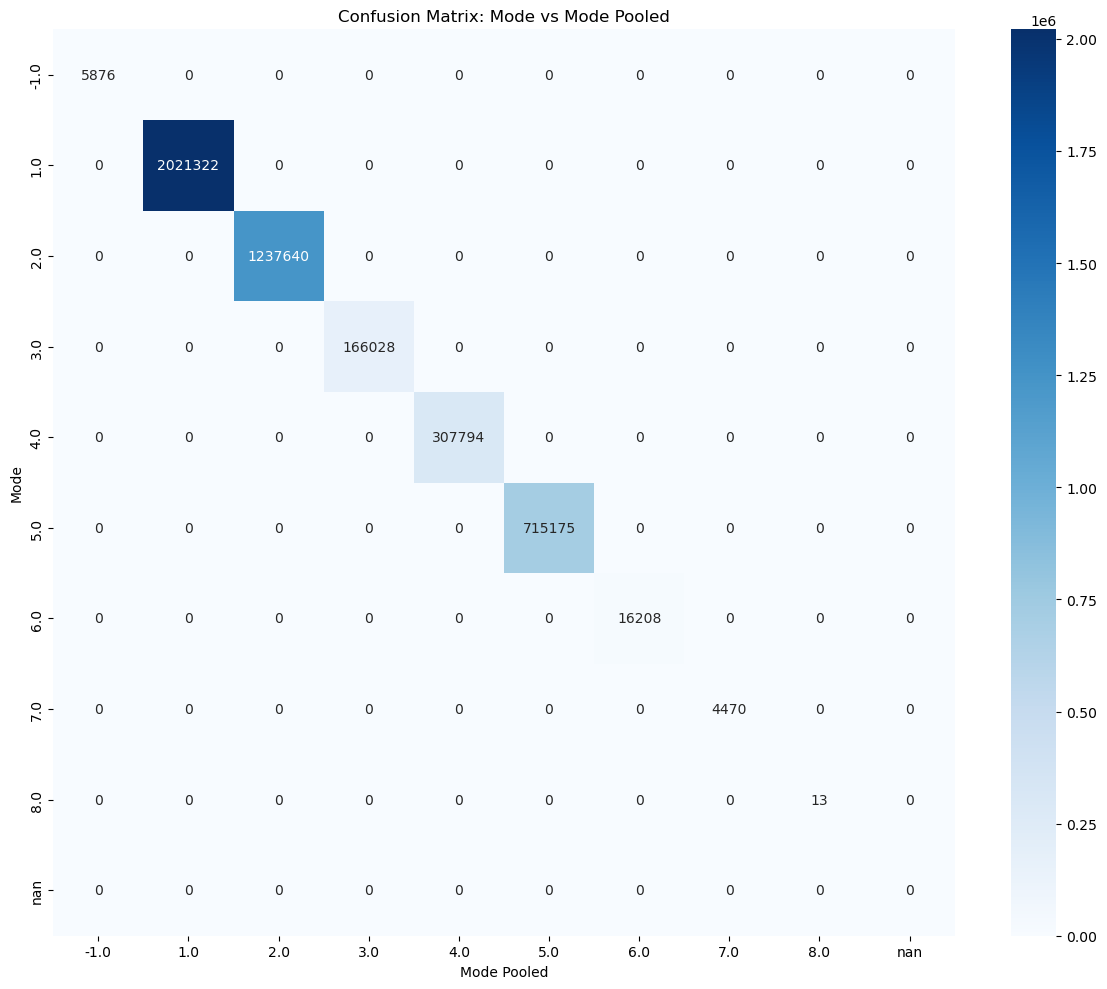

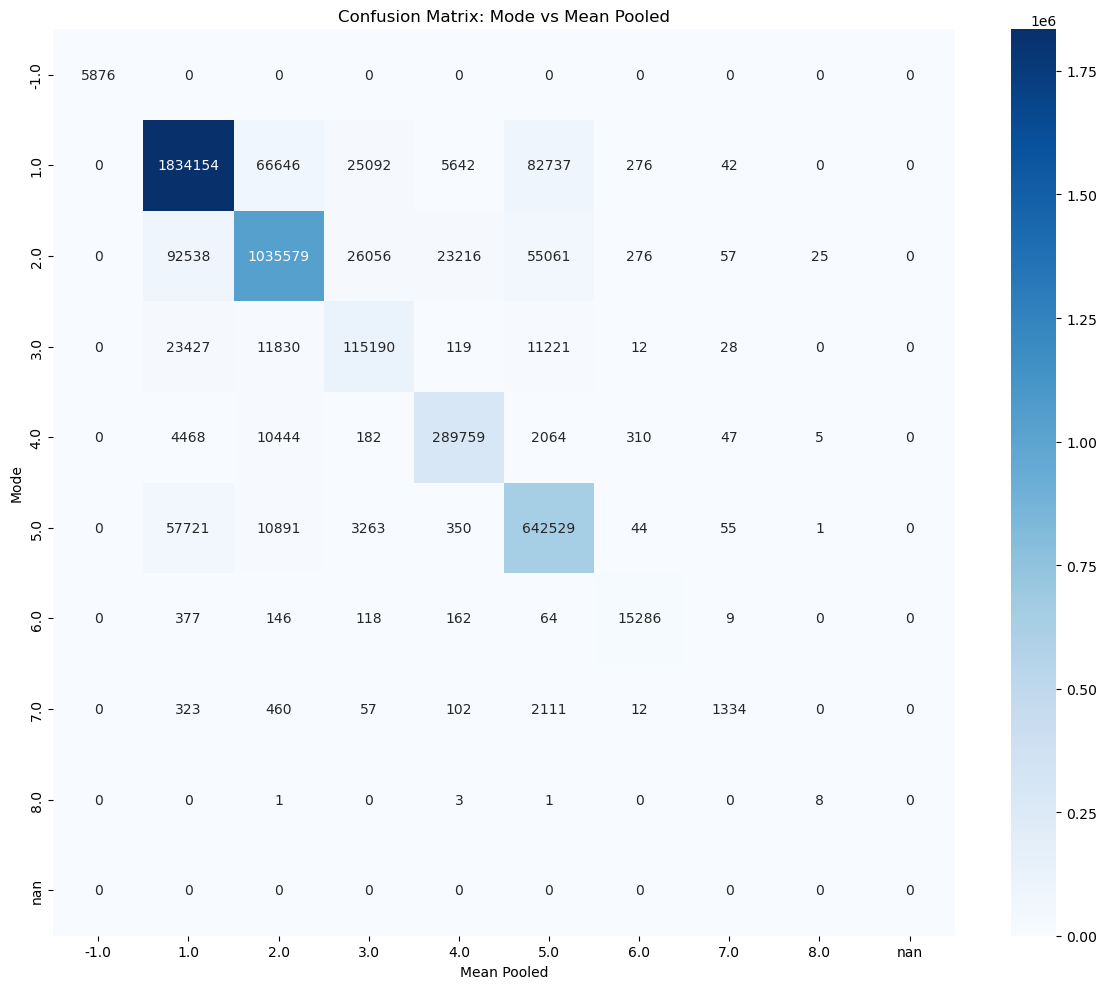

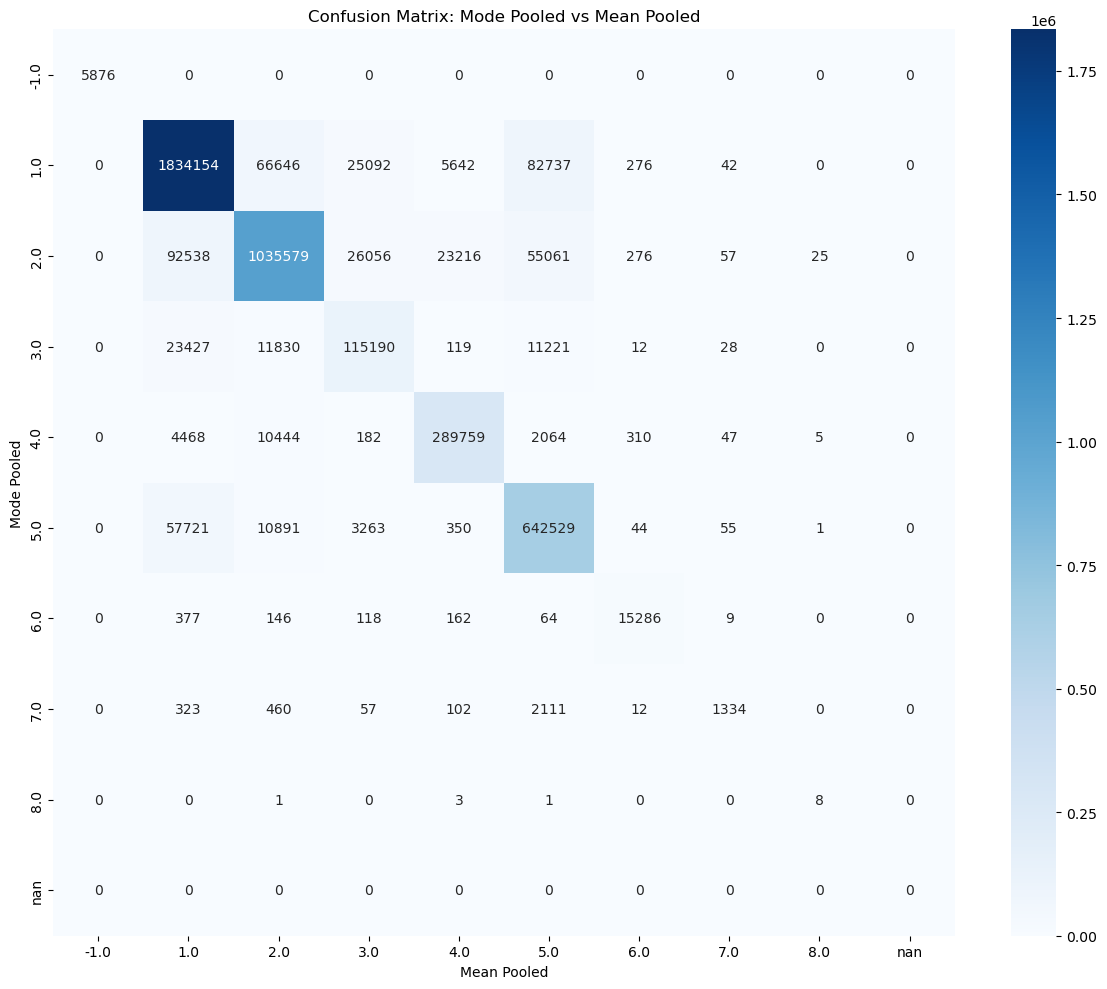


Overall accuracy (Mode vs Mode Pooled): 100.00%
Overall accuracy (Mode vs Mean Pooled): 88.38%
Overall accuracy (Mode Pooled vs Mean Pooled): 88.38%

Per-class accuracies (Mode vs Mode Pooled):
Accuracy for class -1.0: 100.00%
Accuracy for class 1.0: 100.00%
Accuracy for class 2.0: 100.00%
Accuracy for class 3.0: 100.00%
Accuracy for class 4.0: 100.00%
Accuracy for class 5.0: 100.00%
Accuracy for class 6.0: 100.00%
Accuracy for class 7.0: 100.00%
Accuracy for class 8.0: 100.00%
Accuracy for class nan: nan%

Per-class accuracies (Mode vs Mean Pooled):
Accuracy for class -1.0: 100.00%
Accuracy for class 1.0: 91.04%
Accuracy for class 2.0: 84.00%
Accuracy for class 3.0: 71.18%
Accuracy for class 4.0: 94.30%
Accuracy for class 5.0: 89.88%
Accuracy for class 6.0: 94.58%
Accuracy for class 7.0: 30.33%
Accuracy for class 8.0: 61.54%
Accuracy for class nan: nan%

Per-class accuracies (Mode Pooled vs Mean Pooled):
Accuracy for class -1.0: 100.00%
Accuracy for class 1.0: 91.04%
Accuracy for cla

C:\Users\PC\AppData\Local\Temp\ipykernel_19060\1608641127.py:90: RuntimeWarning: invalid value encountered in divide
  per_class_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)


In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_xarray_file(file_path):
    return xr.open_dataset(file_path)

def create_pairwise_confusion_matrix(ds1, ds2, data_var):
    # Ensure both datasets have the same shape
    if ds1[data_var].shape != ds2[data_var].shape:
        raise ValueError("The two datasets must have the same shape")

    # Get unique labels
    all_labels = np.unique(np.concatenate((ds1[data_var].values.flatten(), ds2[data_var].values.flatten())))
    n_labels = len(all_labels)

    # Initialize confusion matrix
    conf_matrix = np.zeros((n_labels, n_labels), dtype=int)

    # Fill confusion matrix
    for i in range(n_labels):
        for j in range(n_labels):
            conf_matrix[i, j] = np.sum((ds1[data_var].values == all_labels[i]) & (ds2[data_var].values == all_labels[j]))

    return conf_matrix, all_labels

def plot_confusion_matrix(conf_matrix, labels, title, xlabel, ylabel):
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def calculate_accuracy(conf_matrix):
    total_pixels = np.sum(conf_matrix)
    correct_pixels = np.sum(np.diag(conf_matrix))
    return correct_pixels / total_pixels

def main():
    # Load the three xarray files
    file1 = r"D:\Factor-Data\Tesina\Tesina\Validation\2015_parana_delta_mode.nc"
    file2 = r"D:\Factor-Data\Tesina\Tesina\Validation\2015_parana_delta_mode_pooled_30m.nc"
    file3 = r"D:\Factor-Data\Tesina\Tesina\Validation\2015_parana_delta_mean_pooled_30m.nc"
    
    ds1 = load_xarray_file(file1)
    ds2 = load_xarray_file(file2)
    ds3 = load_xarray_file(file3)

    # Print dataset info
    #print("Dataset 1 (mode) info:")
    print(ds1.info())
    #print("\nDataset 2 (mode_pooled) info:")
    print(ds2.info())
    #print("\nDataset 3 (mean_pooled) info:")
    print(ds3.info())

    # Specify the data variable name
    data_var = 'label'

    # Create pairwise confusion matrices
    conf_matrix_1_2, labels_1_2 = create_pairwise_confusion_matrix(ds1, ds2, data_var)
    conf_matrix_1_3, labels_1_3 = create_pairwise_confusion_matrix(ds1, ds3, data_var)
    conf_matrix_2_3, labels_2_3 = create_pairwise_confusion_matrix(ds2, ds3, data_var)

    # Plot confusion matrices
    plot_confusion_matrix(conf_matrix_1_2, labels_1_2, 'Confusion Matrix: Mode vs Mode Pooled', 'Mode Pooled', 'Mode')
    plot_confusion_matrix(conf_matrix_1_3, labels_1_3, 'Confusion Matrix: Mode vs Mean Pooled', 'Mean Pooled', 'Mode')
    plot_confusion_matrix(conf_matrix_2_3, labels_2_3, 'Confusion Matrix: Mode Pooled vs Mean Pooled', 'Mean Pooled', 'Mode Pooled')

    # Calculate overall accuracies
    accuracy_1_2 = calculate_accuracy(conf_matrix_1_2)
    accuracy_1_3 = calculate_accuracy(conf_matrix_1_3)
    accuracy_2_3 = calculate_accuracy(conf_matrix_2_3)

    print(f"\nOverall accuracy (Mode vs Mode Pooled): {accuracy_1_2:.2%}")
    print(f"Overall accuracy (Mode vs Mean Pooled): {accuracy_1_3:.2%}")
    print(f"Overall accuracy (Mode Pooled vs Mean Pooled): {accuracy_2_3:.2%}")

    # Calculate per-class accuracies
    for conf_matrix, labels, name1, name2 in [
        (conf_matrix_1_2, labels_1_2, "Mode", "Mode Pooled"),
        (conf_matrix_1_3, labels_1_3, "Mode", "Mean Pooled"),
        (conf_matrix_2_3, labels_2_3, "Mode Pooled", "Mean Pooled")
    ]:
        print(f"\nPer-class accuracies ({name1} vs {name2}):")
        per_class_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
        for label, acc in zip(labels, per_class_accuracy):
            print(f"Accuracy for class {label}: {acc:.2%}")

if __name__ == "__main__":
    main()